In [1]:
import pyarrow as pa
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
import fastparquet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('/home/vinicius.vancellote/data/BaseAnalise.parquet',engine='fastparquet')
zonas = pd.read_csv('/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Zonas_Pluviometricas.csv')

In [3]:
condicao = [df['acumulado_chuva_1_h']==0.0,df['acumulado_chuva_1_h']<5.0,df['acumulado_chuva_1_h']<=25.0,df['acumulado_chuva_1_h']<=50.0]
resultados = ['Sem_Chuva','Chuva_Fraca','Chuva_Moderada','Chuva_Forte']
df['Class_Chuva']=np.select(condicao,resultados,'Chuva_Muito_Forte')

In [4]:
df.head()

,data_particao,horario,id_estacao,acumulado_chuva_15_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,velocidade_inst,agitacao,avgspeed,qtd_onibus,qtd_registros,Class_Chuva
0,2019-08-27,00:00:00,1.0,0.0,0.0,0.0,0.0,10.0,26.583333,1.210274,26.397705,2,3,Sem_Chuva
1,2019-08-27,00:00:00,10.0,0.0,0.0,0.0,0.0,3.2,3.693367,86.790892,3.629273,499,1874,Sem_Chuva
2,2019-08-27,00:00:00,11.0,0.0,0.0,0.0,0.0,2.0,8.203266,59.018461,8.249270,174,646,Sem_Chuva
3,2019-08-27,00:00:00,12.0,0.0,0.0,0.0,0.0,5.4,6.332039,86.824507,6.354081,217,1030,Sem_Chuva
4,2019-08-27,00:00:00,13.0,0.0,0.0,0.0,0.0,4.4,17.693548,16.813206,22.598388,30,62,Sem_Chuva


In [6]:
#Abrindo o dataset em Agosto e Dezembro
df_ago = df[df["data_particao"].dt.month==8]
df_dez = df[df["data_particao"].dt.month==12]

In [7]:
df['id_estacao']=df['id_estacao'].astype(float)
df_ago['id_estacao']=df_ago['id_estacao'].astype(float)
df_dez['id_estacao']=df_dez['id_estacao'].astype(float)

<ipython-input-7-d378d0167077>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ago['id_estacao']=df_ago['id_estacao'].astype(float)
<ipython-input-7-d378d0167077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dez['id_estacao']=df_dez['id_estacao'].astype(float)


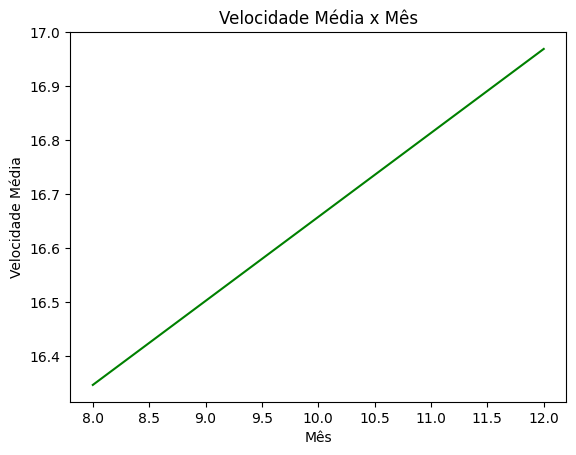

In [8]:
#Comparando as velocidades
df.groupby(df['data_particao'].dt.month)["velocidade_inst"].mean().plot(color='green')
plt.title("Velocidade Média x Mês")
plt.xlabel("Mês")
plt.ylabel("Velocidade Média")
plt.show()

In [ ]:
#Comparando as velocidades
df_ago.groupby(df_ago['horario'])["velocidade_inst"].mean().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["velocidade_inst"].mean().plot(color='red',label='Dezembro')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades dia da semana
# 0 Segunda -> 6 domingo
df_ago.groupby(df_ago['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='red',label='Dezembro')
plt.title("Velocidade Média x Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as agitacoes
df.groupby(df['data_particao'].dt.month)["agitacao"].sum().plot(color='green')
plt.title("Agitacao x Mês")
plt.xlabel("Mês")
plt.ylabel("Agitacao")
plt.show()

In [ ]:
#Comparando as agitacoes
df_ago.groupby(df_ago['horario'])["agitacao"].sum().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["agitacao"].sum().plot(color='red',label='Dezembro')
plt.title("Agitacao x Horário")
plt.xlabel("Horário")
plt.ylabel("Agitacao")
plt.legend()
plt.show()

In [ ]:
#Comparando as agitacoes dia da semana
# 0 Segunda -> 6 domingo
df_ago.groupby(df_ago['data_particao'].dt.dayofweek)["agitacao"].sum().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['data_particao'].dt.dayofweek)["agitacao"].sum().plot(color='red',label='Dezembro')
plt.title("Agitacao x Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Agitacao")
plt.legend()
plt.show()

In [ ]:
#Comparando as Chuvas
df.groupby(df['data_particao'].dt.month)["acumulado_chuva_15_min"].sum().plot(color='green')
plt.title("Chuva x Mês")
plt.xlabel("Mês")
plt.ylabel("Chuva")
plt.show()

In [ ]:
#Comparando as Chuvas
df_ago.groupby(df_ago['horario'])["acumulado_chuva_15_min"].sum().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='Dezembro')
plt.title("Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

In [ ]:
# Mapa de correlação das variáveis numéricas
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

In [ ]:
#Verificando chuva por estação
df_ago.groupby(df_ago['id_estacao'].astype(str))["acumulado_chuva_15_min"].sum().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['id_estacao'].astype(str))["acumulado_chuva_15_min"].sum().plot(color='red',label="Dezembro")
plt.title("Chuva x Estacao")
plt.legend()
plt.xlabel("Estacao")
plt.ylabel("Chuva")
plt.show()

In [ ]:
#Abrindo o dataset por estacao
df_r1= df[df["id_estacao"]==1.0]
df_r2= df[df["id_estacao"]==2.0]
df_r3= df[df["id_estacao"]==3.0]
df_r4= df[df["id_estacao"]==4.0]
df_r5= df[df["id_estacao"]==5.0]
df_r6= df[df["id_estacao"]==6.0]
df_r7= df[df["id_estacao"]==7.0]
df_r8= df[df["id_estacao"]==8.0]
df_r9= df[df["id_estacao"]==9.0]
df_r10= df[df["id_estacao"]==10.0]
df_r11= df[df["id_estacao"]==11.0]
df_r12= df[df["id_estacao"]==12.0]
df_r13= df[df["id_estacao"]==13.0]
df_r14= df[df["id_estacao"]==14.0]
df_r15= df[df["id_estacao"]==15.0]
df_r16= df[df["id_estacao"]==16.0]
df_r17= df[df["id_estacao"]==17.0]
df_r18= df[df["id_estacao"]==18.0]
df_r19= df[df["id_estacao"]==19.0]
df_r20= df[df["id_estacao"]==20.0]
df_r21= df[df["id_estacao"]==21.0]
df_r22= df[df["id_estacao"]==22.0]
df_r23= df[df["id_estacao"]==23.0]
df_r24= df[df["id_estacao"]==24.0]
df_r25= df[df["id_estacao"]==25.0]
df_r26= df[df["id_estacao"]==26.0]
df_r27= df[df["id_estacao"]==27.0]
df_r28= df[df["id_estacao"]==28.0]
df_r29= df[df["id_estacao"]==29.0]
df_r30= df[df["id_estacao"]==30.0]
df_r31= df[df["id_estacao"]==31.0]
df_r32= df[df["id_estacao"]==32.0]
df_r33= df[df["id_estacao"]==33.0]

In [ ]:
#Comparando as velocidades por região
df_r28.groupby(df_r28[df_r28['data_particao'].dt.month==8]['horario'])["velocidade_inst"].mean().plot(color='orange',label='R_28_Agosto')
df_r32.groupby(df_r32[df_r32['data_particao'].dt.month==8]['horario'])["velocidade_inst"].mean().plot(color='pink',label='R_32_Agosto')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as chuvas por região
df_r28.groupby(df_r28[df_r28['data_particao'].dt.month==8]['horario'])["acumulado_chuva_15_min"].sum().plot(color='orange',label='R_28_Agosto')
df_r32.groupby(df_r32[df_r32['data_particao'].dt.month==8]['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='R_32_Agosto')
plt.title("Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

In [ ]:
table_chuva = df.groupby(by=['data_particao'],as_index=False).agg(
chuva = pd.NamedAgg(column='acumulado_chuva_15_min',aggfunc='sum'))
table_chuva['dia_semana']=table_chuva['data_particao'].dt.dayofweek
table_chuva=table_chuva.sort_values(by=['chuva'],ignore_index=True,ascending=False)
table_chuva

In [ ]:
#Comparando as velocidades
df.groupby(df[df['data_particao']=='2019-08-04']['horario'])["velocidade_inst"].mean().plot(color='red',label='04/08 - Chuva')
df.groupby(df[df['data_particao']=='2019-08-11']['horario'])["velocidade_inst"].mean().plot(color='green',label='11/08 - Seco')
df.groupby(df[df['data_particao']=='2019-08-04']['horario'])["acumulado_chuva_15_min"].mean().plot(color='pink',label='04/08 - Chuva')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
df.groupby(df[df['Class_Chuva']=='Sem_Chuva']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='black',label='Sem Chuva')
df.groupby(df[df['Class_Chuva']=='Chuva_Fraca']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='green',label='Chuva Fraca')
df.groupby(df[df['Class_Chuva']=='Chuva_Moderada']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='pink',label='Chuva Moderada')
df.groupby(df[df['Class_Chuva']=='Chuva_Forte']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='orange',label='Chuva Forte')
df.groupby(df[df['Class_Chuva']=='Chuva_Muito_Forte']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='red',label='Chuva Muito Forte')
plt.title("Velocidade Média x Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
table_classchuva = df.groupby(by=['Class_Chuva'],as_index=False)['qtd_registros'].sum()
table_classchuva

In [ ]:
df.groupby(df[df['Class_Chuva']=='Sem_Chuva']['horario'])["velocidade_inst"].mean().plot(color='black',label='Sem Chuva')
df.groupby(df[df['Class_Chuva']=='Chuva_Fraca']['horario'])["velocidade_inst"].mean().plot(color='green',label='Chuva Fraca')
df.groupby(df[df['Class_Chuva']=='Chuva_Moderada']['horario'])["velocidade_inst"].mean().plot(color='pink',label='Chuva Moderada')
df.groupby(df[df['Class_Chuva']=='Chuva_Forte']['horario'])["velocidade_inst"].mean().plot(color='orange',label='Chuva Forte')
df.groupby(df[df['Class_Chuva']=='Chuva_Muito_Forte']['horario'])["velocidade_inst"].mean().plot(color='red',label='Chuva Muito Forte')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
df_semchuva= df[df["Class_Chuva"]=='Sem_Chuva']
df_chuvafraca= df[df["Class_Chuva"]=='Chuva_Fraca']
df_chuvamoderada= df[df["Class_Chuva"]=='Chuva_Moderada']
df_chuvaforte= df[df["Class_Chuva"]=='Chuva_Forte']
df_chuvamtforte= df[df["Class_Chuva"]=='Chuva_Muito_Forte']


In [ ]:
# Mapa de correlação das variáveis numéricas semchuva
sns.heatmap(df_semchuva.corr(), annot=True, cmap="PiYG")
plt.show()

In [ ]:
# Mapa de correlação das variáveis numéricas chuvafraca
sns.heatmap(df_chuvafraca.corr(), annot=True, cmap="PiYG")
plt.show()

In [ ]:
# Mapa de correlação das variáveis numéricas chuvamoderada
sns.heatmap(df_chuvamoderada.corr(), annot=True, cmap="PiYG")
plt.show()

In [ ]:
# Mapa de correlação das variáveis numéricas chuvaforte
sns.heatmap(df_chuvaforte.corr(), annot=True, cmap="PiYG")
plt.show()

In [ ]:
zonas

In [ ]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12 - Chuva')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12 - Seco')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='23/12 - mmChuva')
plt.title("Região 4 - Tijuca - Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["velocidade_inst"].mean().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["velocidade_inst"].mean().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Velocidade x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["agitacao"].sum().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["agitacao"].sum().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["agitacao"].sum().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["agitacao"].sum().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Agitação x Horário")
plt.xlabel("Horário")
plt.ylabel("Agitação")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["acumulado_chuva_15_min"].sum().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["acumulado_chuva_15_min"].sum().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='pink',label='Barra')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='Tijuca')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='mmChuva Tijuca')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='mmChuva Barra')
plt.title("Barra x Tijuca - Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-09']['horario'])["velocidade_inst"].mean().plot(color='pink',label='09/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-02']['horario'])["velocidade_inst"].mean().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Velocidade x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade")
plt.legend()
plt.show()